# **Основная часть**

### **Получение библиотек и выгрузка базы данных**

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

df = pd.read_csv('inf_ege_data.csv',
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

### **Анализ данных из полученной базы**

**Получение укороченной таблицы**

In [147]:
df.head(5)

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665


**Получение DAU (Количество пользователей за день)**

In [148]:
dau = df.groupby('date').agg(DAU=('user_id', 'nunique'))
dau

,DAU
date,
2023-11-01,508
2023-11-02,617
2023-11-03,514
2023-11-04,331
2023-11-05,247
...,...
2024-06-26,626
2024-06-27,542
2024-06-28,445


In [149]:
print('Минимальное количество пользователей в один из дней:', dau.DAU.min())
print('Максимальное количество пользователей в один из дней:', dau.DAU.max())

Минимальное количество пользователей в один из дней: 59
Максимальное количество пользователей в один из дней: 6159


**Получение WAU (Количество пользователей за неделю)**

In [150]:
df['weekday'] = df['date'].dt.weekday
df['weekday'] = df['weekday'].apply(lambda x: np.timedelta64(x, 'D'))
df['week'] = df['date'] - df['weekday']
wau = df.groupby('week').agg(WAU=('user_id', 'nunique'))
wau

,WAU
week,
2023-10-30,1998
2023-11-06,3227
2023-11-13,2668
2023-11-20,2100
2023-11-27,1956
2023-12-04,1618
2023-12-11,2061
2023-12-18,1650
2023-12-25,891


In [151]:
print('Минимальное количество пользователей в одну из недель:', wau.WAU.min())
print('Максимальное количество пользователей в одну из недель:', wau.WAU.max())

Минимальное количество пользователей в одну из недель: 524
Максимальное количество пользователей в одну из недель: 14665


**Получение MAU (Количество пользователей за месяц)**

In [152]:
df['month'] = df['date'].dt.to_period('M')
mau = df.groupby('month').agg(MAU=('user_id', 'nunique'))
mau

,MAU
month,
2023-11,9612
2023-12,5575
2024-01,11076
2024-02,15590
2024-03,26179
2024-04,31917
2024-05,26464
2024-06,21579


In [153]:
print('Минимальное количество пользователей в один из месяцев:', mau.MAU.min())
print('Максимальное количество пользователей в один из месяцев:', mau.MAU.max())

Минимальное количество пользователей в один из месяцев: 5575
Максимальное количество пользователей в один из месяцев: 31917


### **Визуализация ключевых метрик (DAU, WAU, MAU)**

**Визуализация DAU (с интервалом текста в 7 дней, во избежение наложения текста друг на друга)**

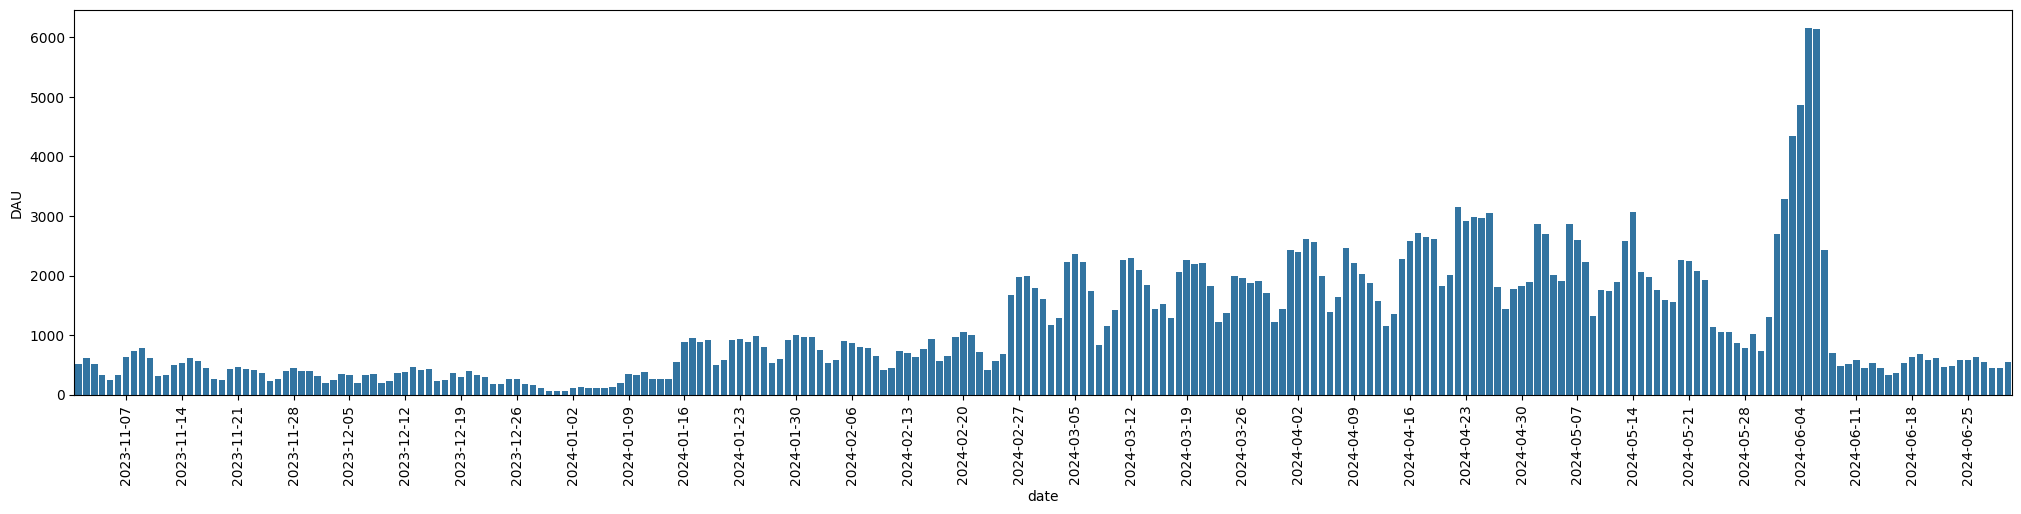

In [154]:
plt.figure(figsize=(25, 5))
ax = sns.barplot(dau, x='date', y='DAU')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks(rotation=90)
plt.show()


**Визуализация WAU**

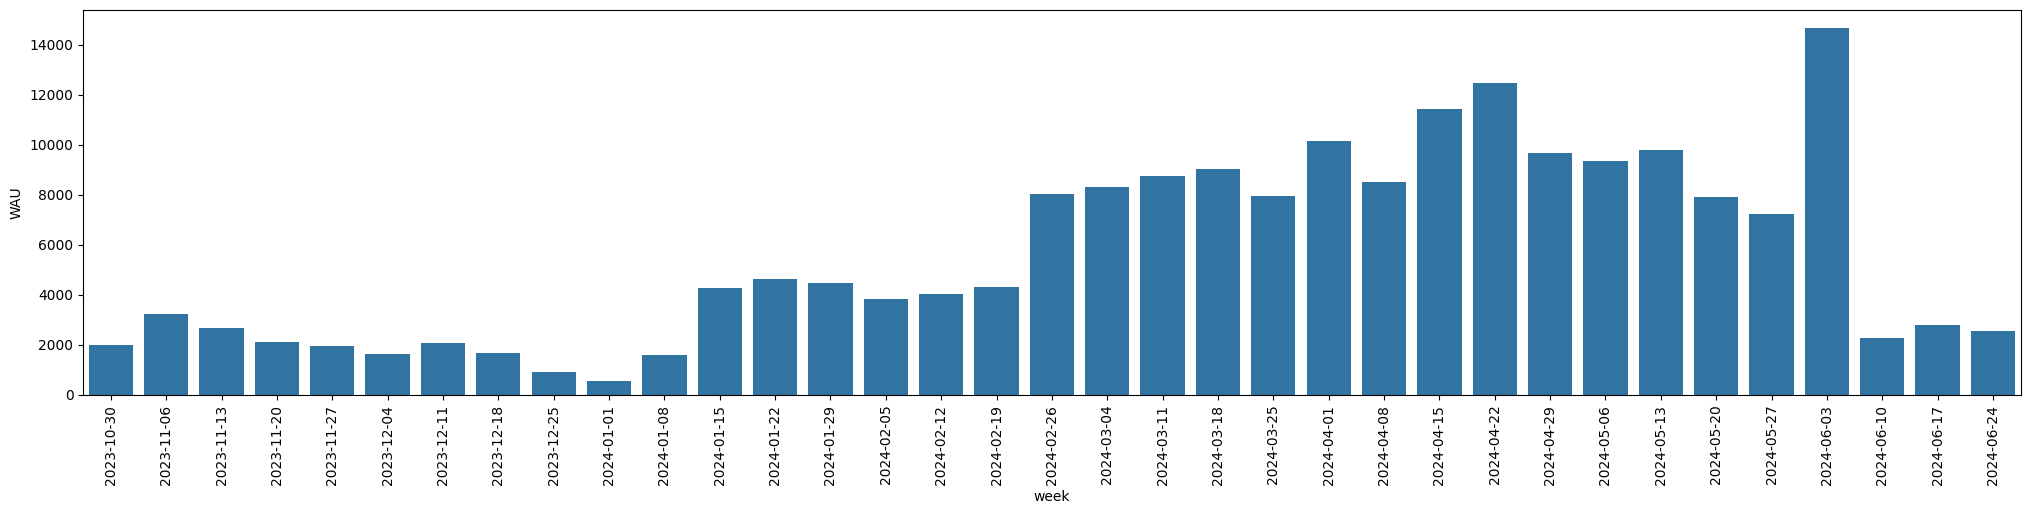

In [155]:
plt.figure(figsize=(25, 5))
sns.barplot(wau, x='week', y='WAU')
plt.xticks(rotation=90)
plt.show()

**Визуализация MAU**

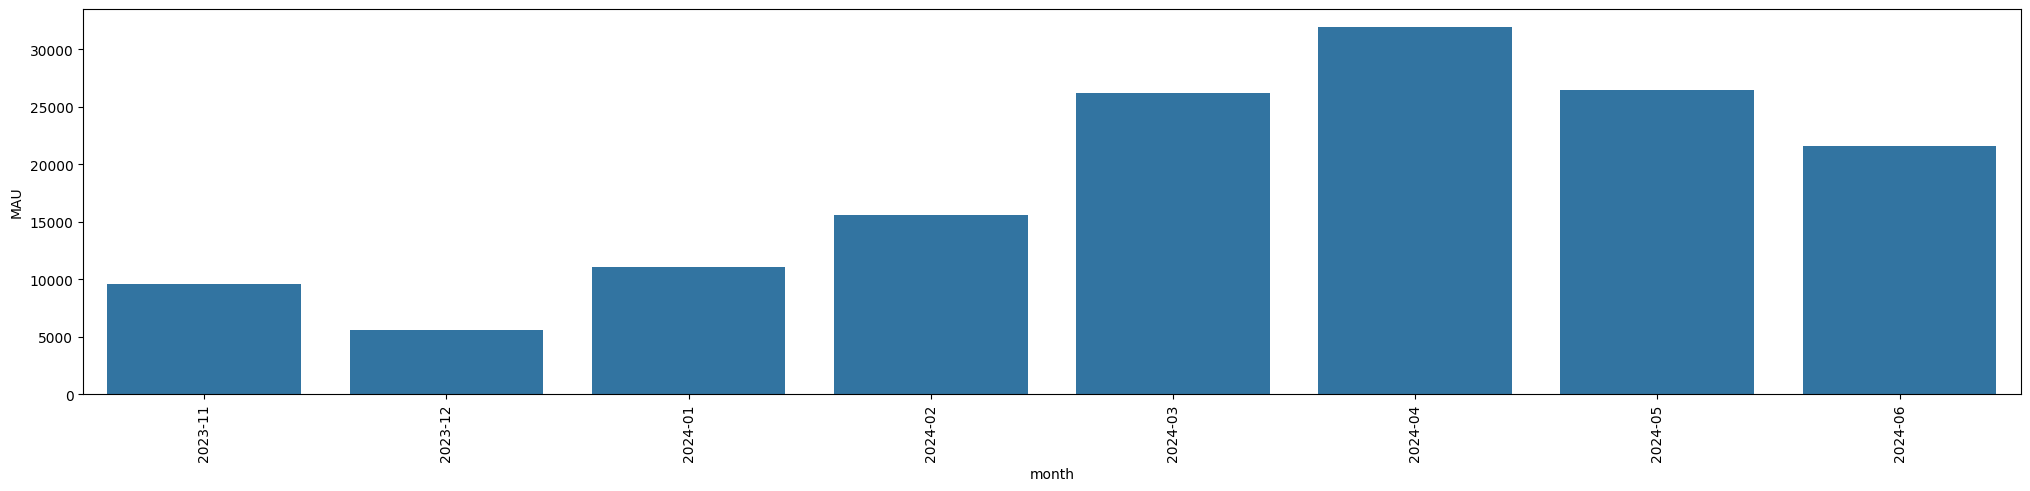

In [156]:
plt.figure(figsize=(25, 5))
sns.barplot(mau, x='month', y='MAU')
plt.xticks(rotation=90)
plt.show()

# **Дополнительно**

### **Получение библиотек и выгрузка базы данных**

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

df = pd.read_csv('inf_ege_data.csv',
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

df['months'] = df['date'].dt.to_period('M')

### **Анализ данных из полученной базы**

**Анализ решений по сложности выполнения в виде таблицы**

In [158]:
diff = df.groupby(['months','difficulty']).agg({'difficulty':'count'})
diff

difficulty
months  difficulty            
2023-11 1                 1509
        2                12253
        3                23701
        4                 3761
        5                 2529
2023-12 1                 3981
        2                 7479
        3                16666
        4                 2877
        5                 1232
2024-01 1                 9109
        2                20321
        3                46254
        4                13224
        5                 1197
2024-02 1                13260
        2                53386
        3                76194
        4                22077
        5                 1956
2024-03 1                21411
        2               179304
        3               238442
        4                67646
        5                 6953
2024-04 1                20903
        2               182667
        3               395910
        4                52855
        5                 4578
2024-05 1                15603
        2               172118
        3               317080
        4                47712
        5                 3549
2024-06 1                15362
        2               114364
        3               330499
        4                50890
        5                 2926

**Анализ решений по сложности выполнения в виде графика**

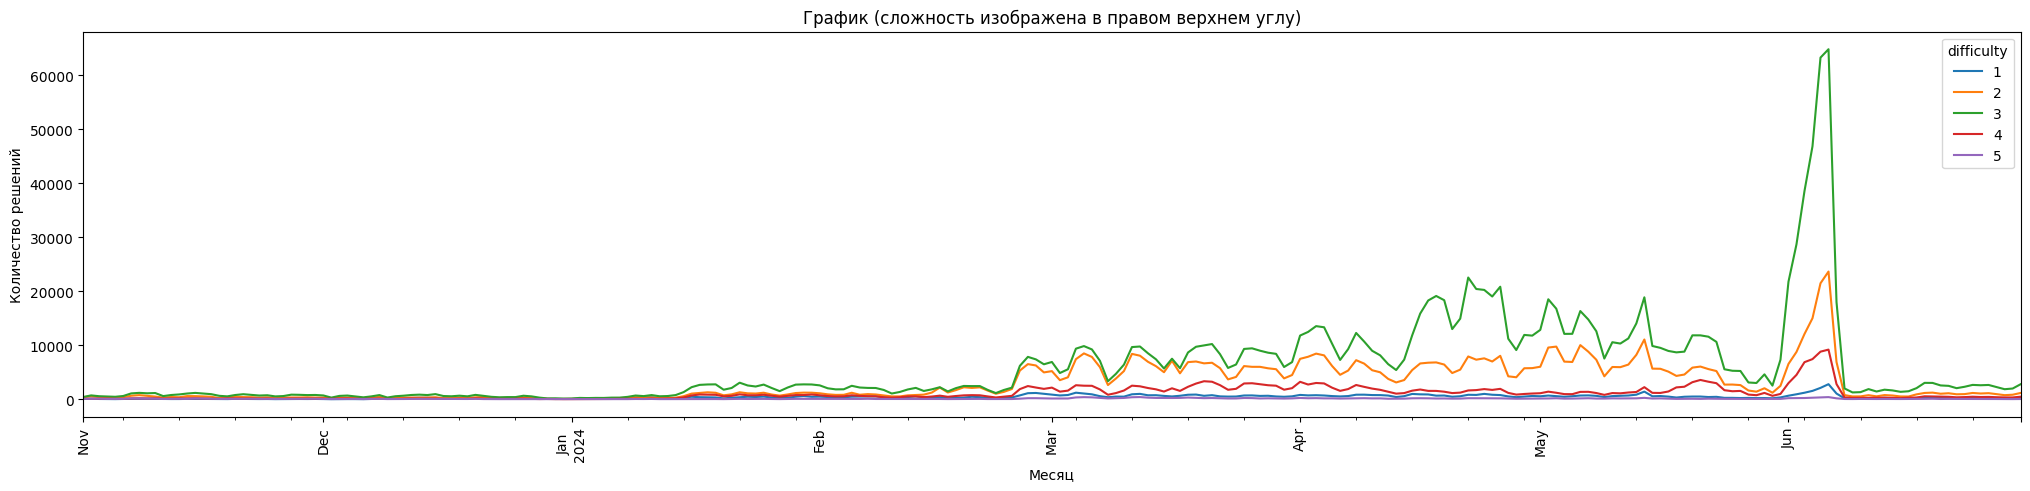

In [167]:
flow_activity = df.groupby(['date', 'difficulty']).size().unstack(fill_value=0)
flow_activity.plot(kind='line', figsize=(25, 5))
plt.title('График (сложность изображена в правом верхнем углу)')
plt.ylabel('Количество решений')
plt.xlabel('Месяц')
plt.xticks(rotation=90)
plt.show()

**Анализ решений по правильности выполнения в виде таблицы**

In [159]:
correct = df.groupby(['months','is_correct']).agg({'is_correct':'count'})
correct

is_correct
months  is_correct            
2023-11 False            23137
        True             20616
2023-12 False            14944
        True             17291
2024-01 False            40602
        True             49503
2024-02 False            98032
        True             68841
2024-03 False           413305
        True            100451
2024-04 False           512274
        True            144639
2024-05 False           438883
        True            117179
2024-06 False           385469
        True            128572

**Анализ решений по правильности выполнения в виде графика**

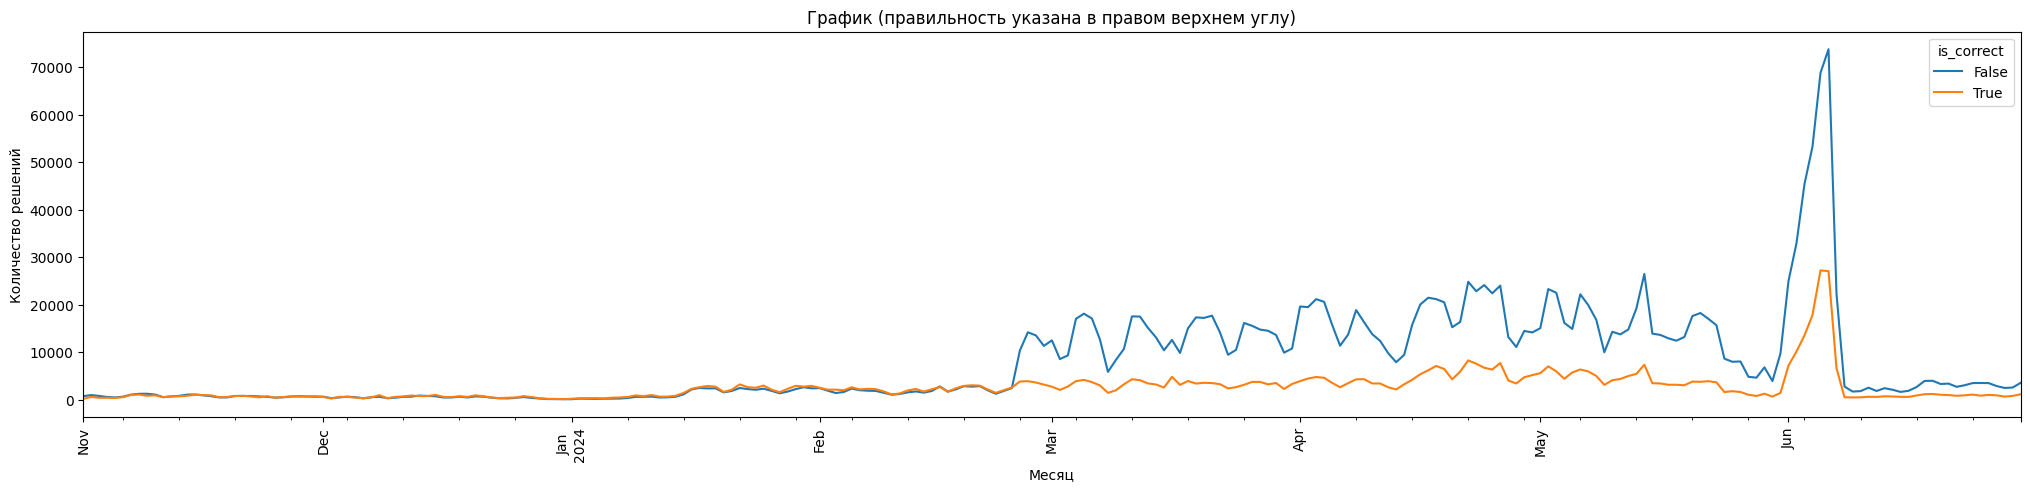

In [169]:
flow_activity = df.groupby(['date', 'is_correct']).size().unstack(fill_value=0)
flow_activity.plot(kind='line', figsize=(25, 5))
plt.title('График (правильность указана в правом верхнем углу)')
plt.ylabel('Количество решений')
plt.xlabel('Месяц')
plt.xticks(rotation=90)
plt.show()

**Анализ решений по типу(practice, variant) выполнения в виде таблицы**

In [162]:
flowa = df.groupby(['months','flow_type']).agg({'flow_type':'count'})
flowa

flow_type
months  flow_type           
2023-11 practice       30977
        variant        12776
2023-12 practice       23035
        variant         9200
2024-01 practice       34355
        variant        55750
2024-02 practice       55491
        variant       111382
2024-03 practice       96480
        variant       417276
2024-04 practice      104253
        variant       552660
2024-05 practice       93570
        variant       462492
2024-06 practice      119718
        variant       394323

**Анализ решений по типу(practice, variant) выполнения в виде графика**

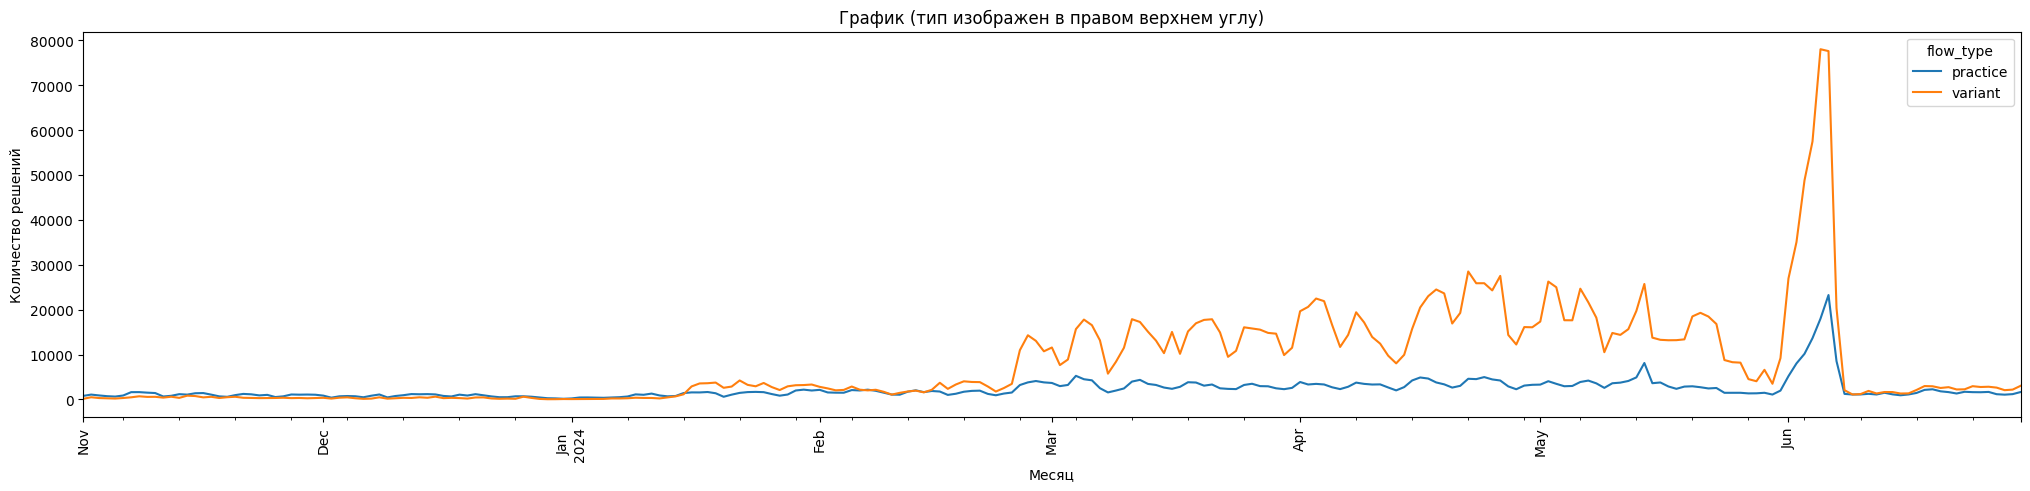

In [170]:
flow_activity = df.groupby(['date', 'flow_type']).size().unstack(fill_value=0)
flow_activity.plot(kind='line', figsize=(25, 5))
plt.title('График (тип изображен в правом верхнем углу)')
plt.ylabel('Количество решений')
plt.xlabel('Месяц')
plt.xticks(rotation=90)
plt.show()